## Final Project Submission

Please fill out: 
* Student name: Lynette Wangari
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Asha Deen
* Blog post URL:


# MICROSOFT MOVIE STUDIO EXPLORATION AND DATA ANALYSIS

### 1) Introduction

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies.  

Our task is to analyze the current movie genres at the Box office and their performance, considering various factors that affect movie success.

This analysis will  provide insights to help Microsoft make informed decisions on which types of films to focus on. To start, we'll gather and analyze relevant data and clarify business objectives. This will establish a solid foundation and direction for the project.

### 2) Problem Statement
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. 

You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

### 3) Data Sets Used
The movie datasets are from the following websites:
1. https://www.boxofficemojo.com/
2. https://www.imdb.com/
3. https://www.rottentomatoes.com/
4. https://www.themoviedb.org/
5. https://www.the-numbers.com/


### 4) Project Structure

1. Data Understanding
2. Data Cleaning and Preparation
3. Exploratory Data Analysis
4. Visualization: Insights Derived from the Values
5. Recommendations: Key findings

Data Cleaning and Preparation
Exploratory Data Analysis
Visualization: Insights Derived from the Values
Recommendations: Key findings


#### 1. Data Understanding
 Our data is stored in a folder called zippedData. So we will first import the necessary packages then we'll explore the data by loading the datasets. 

In [62]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mticker
import seaborn as sns
%matplotlib inline

In [63]:
import sqlite3

# Connect to the database
conn = sqlite3.connect('zippedData/im.db')

# Create a cursor object
cur = conn.cursor()

# Execute the SQL query to fetch the list of tables
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all table names
tables = cur.fetchall()

# Print the list of tables
print(tables)

# Close the connection
conn.close()

[('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


In [64]:
#import data
bom_movie_df = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')
reviews_df = pd.read_csv('./zippedData/rt.reviews.tsv.gz',sep="\t", encoding = 'unicode_escape')
tmdb_df = pd.read_csv('./zippedData/tmdb.movies.csv.gz')
budget_df = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')


In [65]:
import sqlite3
import pandas as pd

# Path to the SQLite database file
db_file_path = r'C:\Users\User\Documents\GitHub\dsc-phase-1-project-v2-4\zippedData\im.db'

# Connect to the SQLite database
conn = sqlite3.connect(db_file_path)

# Read data from the movie_basics table
movie_basics = pd.read_sql("""
    SELECT *
    FROM movie_basics
""", conn)

# Display the first few rows of the DataFrame
movie_basics.head()



,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [66]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [67]:
movie_ratings = pd.read_sql("""
    SELECT *
    FROM movie_ratings
""", conn)
movie_ratings.head(100)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
95,tt1515069,8.3,15
96,tt1515208,6.3,1447
97,tt1516577,5.3,147
98,tt1516595,4.4,64


In [68]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


#### 2. Data Cleaning and Preparation


In [69]:
#cleaning data from Box Office Mojo
#fill missing values with zero
bom_movie_df['foreign_gross'] = bom_movie_df['foreign_gross'].fillna('0')

#remove commas from foreign gross and convert them to float
bom_movie_df['foreign_gross'] = bom_movie_df['foreign_gross'].str.replace(',', '').astype(float)

# Convert 'domestic_gross' column to float
bom_movie_df['domestic_gross'] = bom_movie_df['domestic_gross'].astype(float)

# Reorganize the columns
bom_movie_df = bom_movie_df[['title', 'year', 'domestic_gross', 'foreign_gross']]

In [70]:
bom_movie_df.head()

,title,year,domestic_gross,foreign_gross
0,Toy Story 3,2010,415000000.0,652000000.0
1,Alice in Wonderland (2010),2010,334200000.0,691300000.0
2,Harry Potter and the Deathly Hallows Part 1,2010,296000000.0,664300000.0
3,Inception,2010,292600000.0,535700000.0
4,Shrek Forever After,2010,238700000.0,513900000.0


In [71]:
# cleaning data from Movie Budgets
#  Convert 'release_date' column to datetime format
budget_df['release_date'] = pd.to_datetime(budget_df['release_date'])

# Convert 'production_budget', 'domestic_gross', and 'worldwide_gross' columns to integer format
def clean_currency(x):
   if isinstance(x, str):
        return int(x.replace('$','').replace(',',''))
   else:
        return x

budget_df['production_budget'] = budget_df['production_budget'].map(clean_currency)
budget_df['domestic_gross'] = budget_df['domestic_gross'].map(clean_currency)
budget_df['worldwide_gross'] = budget_df['worldwide_gross'].map(clean_currency)

# Reorganize columns for better readability
budget_df = budget_df[['movie', 'release_date', 'production_budget', 'domestic_gross', 'worldwide_gross']]

In [72]:
budget_df.head()

,movie,release_date,production_budget,domestic_gross,worldwide_gross
0,Avatar,2009-12-18,425000000,760507625,2776345279
1,Pirates of the Caribbean: On Stranger Tides,2011-05-20,410600000,241063875,1045663875
2,Dark Phoenix,2019-06-07,350000000,42762350,149762350
3,Avengers: Age of Ultron,2015-05-01,330600000,459005868,1403013963
4,Star Wars Ep. VIII: The Last Jedi,2017-12-15,317000000,620181382,1316721747


In [73]:
#cleaning movie basics
movie_basics.isna().sum()

#drop the rows
movie_basics['runtime_minutes'].dropna()
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [74]:
#clean the tmdb movies
#drop the original_title
if 'original_title' in tmdb_df.columns:
    tmdb_df.drop(['original_title'], axis=1, inplace=True)

#replace empty genre cells with category undecided
tmdb_df['genre_ids'].replace(to_replace ='[]', value='[7]', inplace=True)




C:\Users\User\AppData\Local\Temp\ipykernel_13916\1826253409.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tmdb_df['genre_ids'].replace(to_replace ='[]', value='[7]', inplace=True)


In [75]:
#dicitonary to translate genre numbers into actual genre names
genre_dict= {'7': 'undecided', '12': 'Adventure', '14': 'Fantasy', '16': 'Animation', '18': 'Drama', '27': 'Horror', '28': 'Action',
    '35': 'Comedy', '36': 'History', '37': 'Western', '53': 'Thriller', '80': 'Crime', '99': 'Documentary', 
    '878': 'Sci-Fi', '9648': 'Mystery', '10402': 'Music', '10749': 'Romance', '10751': 'Family', '10752': 'War', '10770': 'TV'

}
tmdb_df
# Function to convert genre numbers into genre names
def convert_genre(genre_ids):
    description = ''
    for num in genre_ids.strip('][').split(', '):
        if num in genre_dict:
            description += genre_dict[num] + ','
    return description.rstrip(',')

# Convert genre numbers to genre names
tmdb_df['genre_ids'] = tmdb_df['genre_ids'].map(convert_genre)

# Convert 'release_date' column to datetime
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])

# Drop duplicate entries
tmdb_df.drop_duplicates(inplace=True)
tmdb_df

,Unnamed: 0,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count
0,0,"Adventure,Fantasy,Family",12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"Fantasy,Adventure,Animation,Family",10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"Adventure,Action,Sci-Fi",10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"Animation,Comedy,Family",862,en,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"Action,Sci-Fi,Adventure",27205,en,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,26512,"Horror,Drama",488143,en,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"Drama,Thriller",485975,en,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"Fantasy,Action,Adventure",381231,en,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"Family,Adventure,Action",366854,en,0.600,2018-06-22,Trailer Made,0.0,1


Merge Data sets to get information on movie, title release date, runtime, votes, actor and director

In [76]:
#join the movie basics table and movie ratings
movie_basics_ratings_merge = pd.read_sql('''
    SELECT 
        movie_id,
        primary_title AS title,
        start_year AS year,
        runtime_minutes AS runtime,
        genres,
        averagerating AS avg_rating,
        numvotes
    FROM 
        movie_basics
    LEFT JOIN 
        movie_ratings
    USING(movie_id)
''', conn)
movie_basics_ratings_merge.head()

,movie_id,title,year,runtime,genres,avg_rating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [77]:
#merge the principals and persons tables
directors = pd.read_sql('''
    SELECT 
        principals.movie_id, 
        persons.primary_name AS director
    FROM 
        principals
    JOIN 
        persons
    USING(person_id)
    WHERE 
        category = 'director'
''', conn)

directors.head()

,movie_id,director
0,tt0111414,Frank Howson
1,tt0323808,Robin Hardy
2,tt0417610,Alejandro Chomski
3,tt0469152,Alyssa R. Bennett
4,tt0473032,J. Neil Schulman


In [78]:
#group the directors
directors = directors.drop_duplicates()

#define a separator for joining 
separator = ','

#group the directors by movie id and concatenate their names 
directors = directors.groupby('movie_id').agg(lambda x: separator.join(x.tolist())).reset_index()

In [79]:
directors.head(20)

,movie_id,director
0,tt0063540,Harnam Singh Rawail
1,tt0066787,Mani Kaul
2,tt0069049,Orson Welles
3,tt0069204,Hrishikesh Mukherjee
4,tt0100275,"Raoul Ruiz,Valeria Sarmiento"
5,tt0111414,Frank Howson
6,tt0112502,Mc Jones
7,tt0139613,"António Loja Neves,José Manuel Alves Pereira"
8,tt0146592,Ágnes Kocsis
9,tt0154039,Miklós Jancsó


In [80]:
#get actors and from the principals and actors table
# Select actors from principals table where the category is 'actor' and order by movie_id
actors_query = '''
SELECT movie_id, primary_name AS actors
FROM principals
JOIN persons USING(person_id)
WHERE category = 'actor'
ORDER BY movie_id
'''

# Read data from SQL query into a DataFrame
actors = pd.read_sql(actors_query, conn)

# Remove duplicate entries
actors = actors.drop_duplicates()

# Group actors by movie_id and concatenate their names into a single string separated by ','
actors_grouped = actors.groupby('movie_id')['actors'].apply(lambda x: ', '.join(x)).reset_index()


In [81]:
actors.head(20)

,movie_id,actors
0,tt0063540,Dilip Kumar
1,tt0063540,Balraj Sahni
2,tt0063540,Sanjeev Kumar
3,tt0066787,Arun Khopkar
4,tt0066787,Om Shivpuri
5,tt0069049,John Huston
6,tt0069049,Peter Bogdanovich
7,tt0069204,Rabi Ghosh
8,tt0069204,Vijay Arora
9,tt0069204,Asrani


In [82]:
#merge the dataframe containing movie information with that containing directord
merged_df_directors = pd.merge(movie_basics_ratings_merge ,directors, how = 'left', on = 'movie_id')
    


In [83]:
merged_df_directors.head()

,movie_id,title,year,runtime,genres,avg_rating,numvotes,director
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,Harnam Singh Rawail
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43.0,Mani Kaul
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,Orson Welles
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0,Hrishikesh Mukherjee
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,"Raoul Ruiz,Valeria Sarmiento"


In [84]:
sql_df = pd.merge(merged_df_directors, actors, how = 'left', on = 'movie_id')

In [85]:
sql_df.head()

,movie_id,title,year,runtime,genres,avg_rating,numvotes,director,actors
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,Harnam Singh Rawail,Dilip Kumar
1,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,Harnam Singh Rawail,Balraj Sahni
2,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,Harnam Singh Rawail,Sanjeev Kumar
3,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43.0,Mani Kaul,Arun Khopkar
4,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43.0,Mani Kaul,Om Shivpuri


In [86]:

sql_df.dropna(subset=['genres'], inplace = True)
#remove duplicates
sql_df.drop_duplicates(inplace=True)

In [87]:
sql_df.head()

,movie_id,title,year,runtime,genres,avg_rating,numvotes,director,actors
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,Harnam Singh Rawail,Dilip Kumar
1,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,Harnam Singh Rawail,Balraj Sahni
2,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,Harnam Singh Rawail,Sanjeev Kumar
3,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43.0,Mani Kaul,Arun Khopkar
4,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43.0,Mani Kaul,Om Shivpuri


##### Merger Numbers and Box Office to source revenue for every movie

In [88]:
# Merge 'Box Office Mojo' with 'The Numbers' on a common column
bom_budget = pd.merge(bom_movie_df, budget_df, how='outer', left_on='title', right_on='movie')

In [89]:
bom_budget.head(100)

,title,year,domestic_gross_x,foreign_gross,movie,release_date,production_budget,domestic_gross_y,worldwide_gross
0,NaN,NaN,NaN,NaN,#Horror,2015-11-20,1500000.0,0.0,0.0
1,'71,2015.0,1300000.0,355000.0,NaN,NaT,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,(500) Days of Summer,2009-07-17,7500000.0,32425665.0,34439060.0
3,"1,000 Times Good Night",2014.0,53900.0,0.0,NaN,NaT,NaN,NaN,NaN
4,10 Cloverfield Lane,2016.0,72100000.0,38100000.0,10 Cloverfield Lane,2016-03-11,5000000.0,72082999.0,108286422.0
...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,"4 luni, 3 saptamani si 2 zile",2008-01-25,900000.0,1196321.0,11993156.0
96,NaN,NaN,NaN,NaN,4/11,2015-01-01,250000.0,0.0,0.0
97,NaN,NaN,NaN,NaN,40 Days and 40 Nights,2002-03-01,17000000.0,37939782.0,95092667.0
98,NaN,NaN,NaN,NaN,40 Weeks,2014-12-31,900000.0,0.0,0.0


In [90]:
#Fill missing values in the 'title' column with values from the 'movie' column
bom_budget['title'] = bom_budget['title'].fillna(bom_budget['movie'])

In [91]:
#fill missing values in the domestic_gross column
bom_budget['domestic_gross_x'].fillna(bom_budget['domestic_gross_y'], inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_13916\746476591.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bom_budget['domestic_gross_x'].fillna(bom_budget['domestic_gross_y'], inplace=True)


In [92]:
bom_budget.head()

,title,year,domestic_gross_x,foreign_gross,movie,release_date,production_budget,domestic_gross_y,worldwide_gross
0,#Horror,NaN,0.0,NaN,#Horror,2015-11-20,1500000.0,0.0,0.0
1,'71,2015.0,1300000.0,355000.0,NaN,NaT,NaN,NaN,NaN
2,(500) Days of Summer,NaN,32425665.0,NaN,(500) Days of Summer,2009-07-17,7500000.0,32425665.0,34439060.0
3,"1,000 Times Good Night",2014.0,53900.0,0.0,NaN,NaT,NaN,NaN,NaN
4,10 Cloverfield Lane,2016.0,72100000.0,38100000.0,10 Cloverfield Lane,2016-03-11,5000000.0,72082999.0,108286422.0


In [93]:
#calculate the foreign by subtracting domestic_groos_y from worldwide_gross
bom_budget['foreign'] = bom_budget['worldwide_gross'] - bom_budget['foreign_gross']
bom_budget['foreign'].fillna(bom_budget['foreign'], inplace=True)


In [94]:
#fill missing values in the release_date column with converted datetime
bom_budget['release_date'].fillna(pd.to_datetime(bom_budget['year'], format='%Y'), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_13916\1853197591.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bom_budget['release_date'].fillna(pd.to_datetime(bom_budget['year'], format='%Y'), inplace=True)


In [95]:
bom_budget.head()

,title,year,domestic_gross_x,foreign_gross,movie,release_date,production_budget,domestic_gross_y,worldwide_gross,foreign
0,#Horror,NaN,0.0,NaN,#Horror,2015-11-20,1500000.0,0.0,0.0,NaN
1,'71,2015.0,1300000.0,355000.0,NaN,2015-01-01,NaN,NaN,NaN,NaN
2,(500) Days of Summer,NaN,32425665.0,NaN,(500) Days of Summer,2009-07-17,7500000.0,32425665.0,34439060.0,NaN
3,"1,000 Times Good Night",2014.0,53900.0,0.0,NaN,2014-01-01,NaN,NaN,NaN,NaN
4,10 Cloverfield Lane,2016.0,72100000.0,38100000.0,10 Cloverfield Lane,2016-03-11,5000000.0,72082999.0,108286422.0,70186422.0


In [96]:
#fill missing values 
bom_budget['worldwide_gross'].fillna(bom_budget['domestic_gross_x'] + bom_budget['foreign'], inplace=True)
#reorganize columns and drop unnecessary columns
bom_budget = bom_budget[['title', 'release_date', 'domestic_gross_x','foreign', 'worldwide_gross']]
bom_budget.rename(columns={'domestic_gross_x': 'domestic_gross'}, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_13916\256490549.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bom_budget['worldwide_gross'].fillna(bom_budget['domestic_gross_x'] + bom_budget['foreign'], inplace=True)


In [97]:
#drop al rows with missing values 
bom_budget.dropna(inplace=True)
bom_budget = bom_budget[bom_budget['worldwide_gross'] !=0.0]

In [98]:
bom_budget

,title,release_date,domestic_gross,foreign,worldwide_gross
4,10 Cloverfield Lane,2016-03-11,72100000.0,70186422.0,1.082864e+08
18,12 Strong,2018-01-19,45800000.0,49518378.0,7.111838e+07
19,12 Years a Slave,2013-10-18,56700000.0,49925343.0,1.810253e+08
20,127 Hours,2010-11-05,18300000.0,17817171.0,6.021717e+07
23,13 Hours: The Secret Soldiers of Benghazi,2016-01-15,52900000.0,52811370.0,6.941137e+07
...,...,...,...,...,...
7914,Zookeeper,2011-07-08,80400000.0,81305525.0,1.708055e+08
7916,Zoolander 2,2016-02-12,28800000.0,27448693.0,5.534869e+07
7918,Zootopia,2016-03-04,341300000.0,336929616.0,1.019430e+09
7922,[Rec] 2,2010-07-09,27800.0,27766.0,1.852777e+07


#### Merge the two dataframes
Next, we will merge the two datasets containing information about the movies. 

In [99]:
#merge the two dataframes sql_df and tmdb_df
merged_df = pd.merge(sql_df, tmdb_df, how = 'outer', on ='title')


In [100]:
#fill missing values in avg_rating with values from vote average
merged_df['avg_rating'] = merged_df['avg_rating'].fillna(merged_df['vote_average'])
#fill missing values in num votes with valuies from vote count
merged_df['numvotes'] = merged_df['numvotes'].fillna(merged_df['vote_count'])

#fill missing values in the genres with values from genre id
merged_df['genres'] = merged_df['genres'].fillna(merged_df['genre_ids'])

In [101]:
merged_df

,movie_id,title,year,runtime,genres,avg_rating,numvotes,director,actors,Unnamed: 0,genre_ids,id,original_language,popularity,release_date,vote_average,vote_count
0,tt1699720,!Women Art Revolution,2010.0,83.0,Documentary,6.9,196.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1,NaN,"""BLESSED""",NaN,NaN,"Documentary,Adventure",7.0,1.0,NaN,NaN,26355.0,"Documentary,Adventure",564096.0,en,0.600,2018-11-23,7.0,1.0
2,NaN,"""Legitimate Rape"" Pharmaceutical Ad",NaN,NaN,"Comedy,Crime",2.3,2.0,NaN,NaN,7815.0,"Comedy,Crime",283543.0,en,0.600,2012-08-28,2.3,2.0
3,NaN,"""cherry"" - Supreme",NaN,NaN,Documentary,10.0,1.0,NaN,NaN,12812.0,Documentary,263765.0,en,0.893,2014-03-20,10.0,1.0
4,NaN,#1 Cheerleader Camp,NaN,NaN,"Comedy,Drama",3.6,34.0,NaN,NaN,577.0,"Comedy,Drama",41371.0,en,3.277,2010-07-27,3.6,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317055,NaN,纽约客@上海,NaN,NaN,"Romance,Comedy,Drama",6.0,12.0,NaN,NaN,5961.0,"Romance,Comedy,Drama",126186.0,zh,2.416,2012-05-03,6.0,12.0
317056,NaN,마음의 소리 스페셜 1-효! 크러쉬,NaN,NaN,Animation,8.0,1.0,NaN,NaN,26292.0,Animation,602570.0,ko,0.600,2018-12-31,8.0,1.0
317057,NaN,번개맨의 비밀,NaN,NaN,Animation,9.0,1.0,NaN,NaN,26267.0,Animation,591378.0,ko,0.600,2018-12-31,9.0,1.0
317058,NaN,유병재: B의 농담,NaN,NaN,Comedy,6.5,2.0,NaN,NaN,26106.0,Comedy,542691.0,ko,0.708,2018-08-17,6.5,2.0


In [102]:
#convert the year column to datetime format
merged_df['year'] = pd.to_datetime(merged_df['year'], format='%Y')
#fill missing values in year with values from release data
merged_df['year'] = merged_df['year'].fillna(merged_df['release_date'])


In [103]:
merged_df.columns

Index(['movie_id', 'title', 'year', 'runtime', 'genres', 'avg_rating',
       'numvotes', 'director', 'actors', 'Unnamed: 0', 'genre_ids', 'id',
       'original_language', 'popularity', 'release_date', 'vote_average',
       'vote_count'],
      dtype='object')

In [104]:
#drop duplicate columns : release data, genre ids, popularity, vote average, vote count
columns_to_drop = ['release_date', 'genre_ids', 'popularity', 'vote_average', 'vote_count']
columns_to_drop_existing = [col for col in columns_to_drop if col in merged_df.columns]
merged_df.drop(columns = columns_to_drop_existing, inplace=True)

In [105]:
#sort dataframe by numvottes to show movie popularity
merged_df = merged_df.sort_values('numvotes')
merged_df.head()

,movie_id,title,year,runtime,genres,avg_rating,numvotes,director,actors,Unnamed: 0,id,original_language
317059,NaN,해양경찰 마르코,2013-12-31,NaN,"Animation,Adventure,Comedy",8.0,1.0,NaN,NaN,10119.0,596452.0,ko
69462,tt8129892,Demon,2018-01-01,NaN,"Comedy,Horror",1.0,1.0,NaN,Rey Resendiz,10994.0,255299.0,en
69464,tt8129892,Demon,2018-01-01,NaN,"Comedy,Horror",1.0,1.0,NaN,Juan Griffin,10994.0,255299.0,en
69466,tt8129892,Demon,2018-01-01,NaN,"Comedy,Horror",1.0,1.0,NaN,Jerry Gomez,10994.0,255299.0,en
69468,tt8129892,Demon,2018-01-01,NaN,"Comedy,Horror",1.0,1.0,NaN,Jorge Rubio,10994.0,255299.0,en


In [106]:
#remove movies with less than 100 reviews
merged_df = merged_df[merged_df['numvotes'] > 100]

#extract only the yearr from datatime year column
merged_df['year'] = pd.DatetimeIndex(merged_df['year']).year
merged_df

,movie_id,title,year,runtime,genres,avg_rating,numvotes,director,actors,Unnamed: 0,id,original_language
90970,tt8427164,Fidaa,2018,NaN,Drama,5.3,101.0,Pathikrit Basu,Yash Dasgupta,NaN,NaN,NaN
299073,tt3657658,Vedivazhipadu,2013,126.0,Comedy,5.0,101.0,Shambu Purushothaman,Murali Gopy,NaN,NaN,NaN
273663,tt3154604,The Red Man,2016,98.0,"Horror,Mystery",4.4,101.0,Jimmie Gonzalez,Michael O'Neal,20536.0,362304.0,en
164271,tt1698653,"Me & Mr Jones, a love story on Natalee-island",2011,88.0,"Crime,Drama,Mystery",3.5,101.0,Paul Ruven,Robert de Hoog,NaN,NaN,NaN
21536,tt1323962,Andrey Iskanov's Ingression,2010,NaN,Horror,5.1,101.0,Andrey Iskanov,Svyatoslav Iliyasov,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
253801,tt1345836,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769.0,Christopher Nolan,Gary Oldman,5182.0,49026.0,en
253799,tt1345836,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769.0,Christopher Nolan,Christian Bale,5182.0,49026.0,en
124203,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0,Christopher Nolan,Ken Watanabe,4.0,27205.0,en
124202,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0,Christopher Nolan,Joseph Gordon-Levitt,4.0,27205.0,en


#### 3. Exploratory Data Analysis

In this next step, we will analyze the data and create a graph showing the popularity of each genre based on the total number of reviews.

1. We create a new dataframe specifically for this analysis, excluding rows with missing data in the avg_rating and numbers columns.

2. Extract the individual genres from the comma-separated genre lists in the genres column and compile a list of all unique genres.

3. Calculate the average nummber of vites(reviews) for each genre and store the results in a dictionary.

4. Sort the genres and their corresponding average review counts in descending order.

5. Plot a graph displaying the average number of reviews per genre.

In [107]:
#create a  data farame
genre_analysis = merged_df.dropna(subset=['avg_rating', 'numvotes'])

In [108]:
#exctract  individual genres and comile a list of unique genres
categories = []
for genre_list in genre_analysis['genres']:
    for genre in genre_list.split(','):
        categories.append(genre)
all_genres = set(categories)


In [109]:
#calculate average review counts for each genre and store in a dictionary
popularity = {}
for genre in all_genres:
    avg_reviews = genre_analysis[genre_analysis['genres'].str.contains(genre)]['numvotes'].mean()
    popularity[genre] = avg_reviews

In [110]:
#sort genres and review counts
sorted_genres = sorted(popularity, key = popularity.get, reverse=True)
sorted_reviews = sorted(popularity.values(), reverse=True)

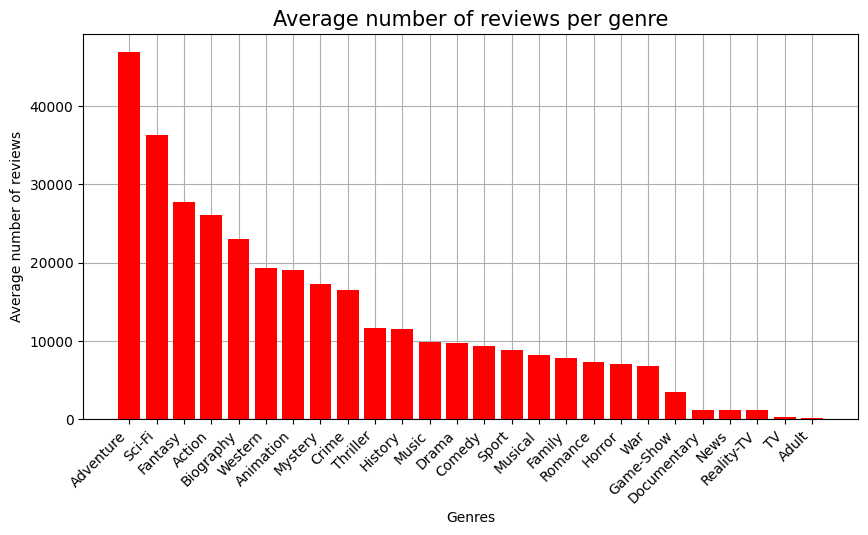

In [141]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))

# Plot the bar graph with red color
ax.bar(sorted_genres, sorted_reviews, color='red', zorder=3)

# Add grid lines
ax.grid(zorder=0)

# Set labels and title
ax.set_xlabel('Genres', fontsize=10)
ax.set_ylabel('Average number of reviews', fontsize=10)
ax.set_title('Average number of reviews per genre', fontsize=15)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

To find the most successful directors for the four most popular movie genres (Action, Adventure, Sci-Fi, Fantasy), we've performed the following analysis and created a graph:

1. Define a Function to Identify Top Directors by Genre:
We define a function getBestDirectors(genre) that takes a genre string as input and returns the top three directors for that genre based on the average number of reviews their movies received.

2. Retrieve Top Directors for Each Genre:
We call the getBestDirectors function for each of the four genres and obtain the top directors' names and their average review counts.

3. Prepare Data for Visualization:
We filter the dataset to include only relevant information about directors, genres, and the number of reviews. Then, we split the data to handle movies with multiple directors or genres.

4. Create a Visualization:
We plot a bar graph showing the popularity of each director based on the average number of reviews for movies in each of the four genres. Directors are grouped by genre, and their names are labeled along with notable movies they directed.

In [119]:
#define a function to identify top directors for a given genre
def getBestDirectors(genre, dataset):
    # Sample the dataset to include only movies with directors and review counts
    relevant_data = dataset.dropna(subset=['director', 'numvotes'])
    genre_movies = relevant_data[relevant_data['genres'].str.contains(genre)]

    # Extract a list of all directors for movies in the given genre
    all_directors = []
    for directors_list in genre_movies['director']:
        for director in directors_list.split(','):
            all_directors.append(director)
            
    # Remove duplicate directors
    unique_directors = set(all_directors)

    # Calculate the average number of reviews for each director
    director_reviews = {}
    for director in unique_directors:
        avg_reviews = genre_movies[genre_movies['director'].str.contains(director)]['numvotes'].mean()
        director_reviews[director] = avg_reviews
    
    # Select the top three directors based on average review count
    top_directors = sorted(director_reviews, key=director_reviews.get, reverse=True)[:3]
    top_reviews = sorted(director_reviews.values(), reverse=True)[:3]
    
    return [top_directors, top_reviews]

# Obtain top directors for each of the four genres
action_directors = getBestDirectors('Action', merged_df)
adventure_directors = getBestDirectors('Adventure', merged_df)
scifi_directors = getBestDirectors('Sci-Fi', merged_df)
fantasy_directors = getBestDirectors('Fantasy', merged_df)

Plot the poularity of each director across genres

In [131]:
# Define the set of best directors across the top genres
the_best_directors = set(action_directors[0] + adventure_directors[0] + scifi_directors[0] + fantasy_directors[0])


# Filter the DataFrame to include relevant information about directors, genres, and votes
filtered_df = merged_df.dropna(subset=['director', 'actors', 'numvotes'])
filtered_df = filtered_df[['genres', 'numvotes', 'director']]
filtered_df = filtered_df[filtered_df['genres'].map(lambda x: any(substr in x for substr in top_genres))]
filtered_df = filtered_df[filtered_df['director'].map(lambda x: any(substr in x for substr in the_best_directors))]


Splitting Director and Genre Lists:


We split the director lists for movies that have multiple directors and create new entries for each director.
Similarly, we split the genre lists for movies and create new entries for each genre

In [132]:
# Split director lists and create new entries for each director
split_directors_df = pd.DataFrame(columns=['genres', 'numvotes', 'director'])
for index, row in filtered_df.iterrows():
    for director in row['director'].split(','):
        split_directors_df.loc[len(split_directors_df.index)] = [row['genres'], row['numvotes'], director]

# Split genre lists and create new entries for each genre
split_genres_df = pd.DataFrame(columns=['genres', 'numvotes', 'director'])
for index, row in split_directors_df.iterrows():
    for genre in row['genres'].split(','):
        split_genres_df.loc[len(split_genres_df.index)] = [genre, row['numvotes'], row['director']]

Filtering Out Unwanted Entries:

We filter out entries in the DataFrame that are not among the top genres or best directors.

In [133]:
# Filter out entries not among the top genres or best directors
final_df = split_genres_df[split_genres_df['genres'].map(lambda x: x in top_genres)]
final_df = final_df[final_df['director'].map(lambda x: x in the_best_directors)]

Plotting the Popularity of Each Director Across Genres:

We create a bar plot to visualize the popularity of each director based on the average number of reviews received for movies in each genre.

C:\Users\User\AppData\Local\Temp\ipykernel_13916\532396637.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  plot = sns.barplot(data=final_df, x='director', y='numvotes', hue='genres', ax=ax, ci=None,


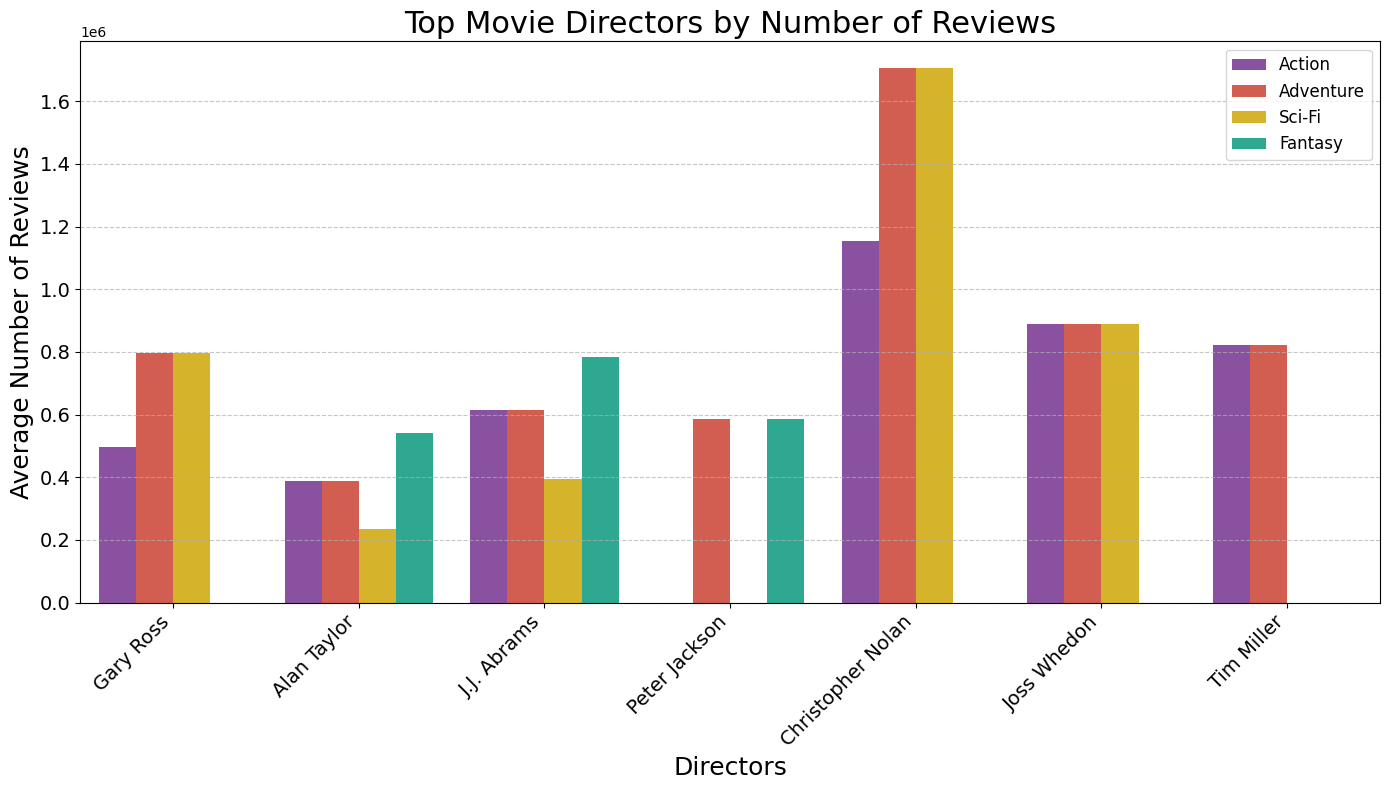

In [140]:
# Define a different color palette
new_palette = ['#8e44ad', '#e74c3c', '#f1c40f', '#1abc9c']  # Purple, Red, Yellow, Teal

# Plot the popularity of each director across genres with the updated aesthetics
fig, ax = plt.subplots(figsize=(14, 8))  # Adjust figure size for better readability
plot = sns.barplot(data=final_df, x='director', y='numvotes', hue='genres', ax=ax, ci=None,
                   palette=new_palette)  # Use the new color palette for better visualization

# Add grid lines to the plot
ax.grid(True, axis='y', linestyle='--', alpha=0.7)  # Add grid lines only along the y-axis with dashed lines and 70% transparency

# Set labels and title for the plot
ax.set_xlabel('Directors', fontsize=18)  # Adjust x-axis label
ax.set_ylabel('Average Number of Reviews', fontsize=18)  # Adjust y-axis label
ax.set_title('Top Movie Directors by Number of Reviews', fontsize=22)  # Adjust title font size

# Set font size for tick labels
ax.tick_params(axis='x', labelsize=14)  # Adjust x-axis tick label font size
ax.tick_params(axis='y', labelsize=14)  # Adjust y-axis tick label font size

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust legend position and font size
plt.legend(loc='upper right', fontsize='large')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()